In [1]:
import numpy as np
import matplotlib.pyplot as plt

# How to compute the average and standard deviation of a dihedral angle

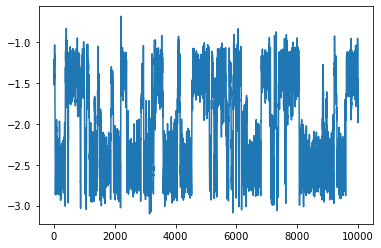

In [2]:
colvar=np.loadtxt("COLVAR")
plt.plot(colvar[:,1])
plt.show()

In [3]:
np.average(np.sin(colvar[:,1])) , np.average(np.cos(colvar[:,1]))

(-0.7718313548445271, -0.3662028359018232)

In [4]:
# average
np.arctan2(np.average(np.sin(colvar[:,1])) , np.average(np.cos(colvar[:,1])))

-2.0138036952985403

In [5]:
# standard deviation
np.sqrt( np.std(np.sin(colvar[:,1]))**2 + np.std(np.cos(colvar[:,1]))**2 )

0.5197805716418458

In [6]:
# As an alternative, let's fix the trajectory by hand
a=0
colvar1=+colvar
for i in range(len(colvar1)):
    if(colvar1[i,1]>0): colvar1[i,1]-=2*np.pi

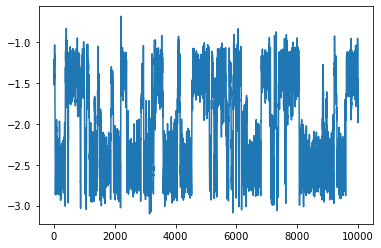

In [7]:
plt.plot(colvar1[:,1])
plt.show()

In [8]:
# average and stddev
np.average(colvar1[:,1]), np.std(colvar1[:,1])

(-2.0099938333166683, 0.5504812159209945)

# Analyzing weighted simulations
We here assume that the `COLVAR_8` file contains 4 columns like these ones:
````
#! FIELDS time phi psi metad.bias
#! SET min_phi -pi
#! SET max_phi pi
#! SET min_psi -pi
#! SET max_psi pi
 0.000000 -1.497988 0.273498 92.071992
 1.000000 -1.449714 0.576594 92.366062
 2.000000 -1.209587 0.831417 91.426647
````
etc

In [9]:
colvar=np.loadtxt("COLVAR_8")

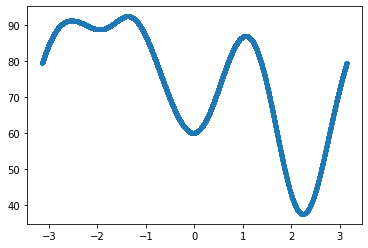

In [10]:
# bias depends on phi (column 1)
plt.plot(colvar[:,1],colvar[:,3],".")
plt.show()

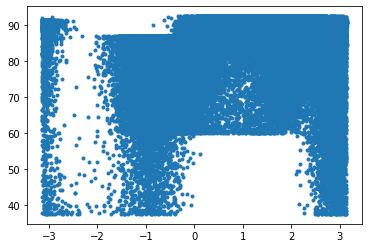

In [11]:
# dependence on psi is more complicated
plt.plot(colvar[:,2],colvar[:,3],".")
plt.show()

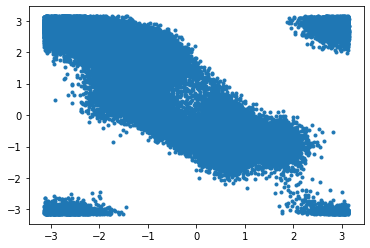

In [12]:
# here's out 2D scatter plot
plt.plot(colvar[:,1],colvar[:,2],".")
plt.show()

In [13]:
# let's compute the free energy difference between two states:
PA=0
PB=0
for i in range(len(colvar)):
    if(colvar[i,1]<-0.8 and colvar[i,1]>-2 ): # first state, -2<phi<-0.8
        PA+=np.exp(colvar[i,3]/2.5)
    if(colvar[i,1]<2 and colvar[i,1]>0 ): # second state, 0<phi<2
        PB+=np.exp(colvar[i,3]/2.5)
# actually, state definition might depend on psi as well
-2.5*np.log(PA/PB)

-7.688379070472906